In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv("Salary.csv")
dados.drop_duplicates(inplace=True)
dados

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6678,37.0,Male,1,Sales Representative,6.0,75000.0,Canada,Asian,0
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China,Chinese,0


In [92]:
corr = dados.corr()

C:\Users\daniel.suassuna\AppData\Local\Temp\ipykernel_14408\2395735503.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dados.corr()


In [170]:
corr["Salary"]

Age                    0.728343
Education Level        0.645444
Years of Experience    0.810942
Salary                 1.000000
Senior                 0.223636
Name: Salary, dtype: float64

In [171]:
dados["Years of Experience"].max()
dados["Job Title"].value_counts()
dados["Years of Experience"].value_counts()

2.0     474
3.0     437
1.0     408
4.0     395
6.0     332
8.0     319
5.0     305
9.0     284
7.0     253
11.0    239
12.0    233
14.0    187
16.0    177
13.0    173
10.0    165
15.0    111
18.0    106
19.0     99
17.0     81
0.0      77
20.0     55
22.0     43
21.0     42
23.0     35
25.0     23
24.0     17
28.0     15
1.5      11
32.0     10
27.0      9
29.0      8
26.0      7
30.0      6
33.0      6
31.0      3
34.0      2
0.5       1
Name: Years of Experience, dtype: int64

In [172]:
dados["income_category"] = pd.cut(dados["Years of Experience"], 
                                  bins=[-1,6,12,15,18,21,24,28,32,34],
                                  labels=[1,2,3,4,5,6,7,8,9])

In [208]:
dados["income_category"] = dados["income_category"].astype("Int64")
dados.drop("income_category",axis=1,inplace=True)

In [174]:
dados["income_category"].value_counts()

1    2440
2    1493
3     471
4     364
5     196
6      95
7      54
8      27
9       8
Name: income_category, dtype: Int64

In [175]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
X = dados.drop("Salary",axis=1)
y = dados["Salary"].copy()
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [176]:
x_train

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,Senior,income_category
5658,31.0,Female,3,Data Scientist,8.0,China,Chinese,0,2
6042,38.0,Male,2,Marketing Director,14.0,China,Chinese,0,3
1215,37.0,Female,2,Software Engineer,9.0,UK,Asian,1,2
6638,32.0,Male,0,Sales Representative,3.0,USA,White,0,1
6476,41.0,Male,1,Content Marketing Manager,12.0,Canada,White,0,2
...,...,...,...,...,...,...,...,...,...
3782,30.0,Male,1,Operations Manager,5.0,USA,African American,0,1
3587,28.0,Male,1,Web Developer,4.0,USA,Hispanic,0,1
3781,35.0,Female,2,Marketing Coordinator,8.0,USA,Asian,0,2
604,27.0,Male,1,Software Engineer,4.0,Australia,White,0,1


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Education Level', ylabel='Age'>,
        <Axes: xlabel='Years of Experience', ylabel='Age'>,
        <Axes: xlabel='Senior', ylabel='Age'>,
        <Axes: xlabel='income_category', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Education Level'>,
        <Axes: xlabel='Education Level', ylabel='Education Level'>,
        <Axes: xlabel='Years of Experience', ylabel='Education Level'>,
        <Axes: xlabel='Senior', ylabel='Education Level'>,
        <Axes: xlabel='income_category', ylabel='Education Level'>],
       [<Axes: xlabel='Age', ylabel='Years of Experience'>,
        <Axes: xlabel='Education Level', ylabel='Years of Experience'>,
        <Axes: xlabel='Years of Experience', ylabel='Years of Experience'>,
        <Axes: xlabel='Senior', ylabel='Years of Experience'>,
        <Axes: xlabel='income_category', ylabel='Years of Experience'>],
       [<Axes: xlabel='Age', ylabel='Senior'>,
        <Axes: xlabel

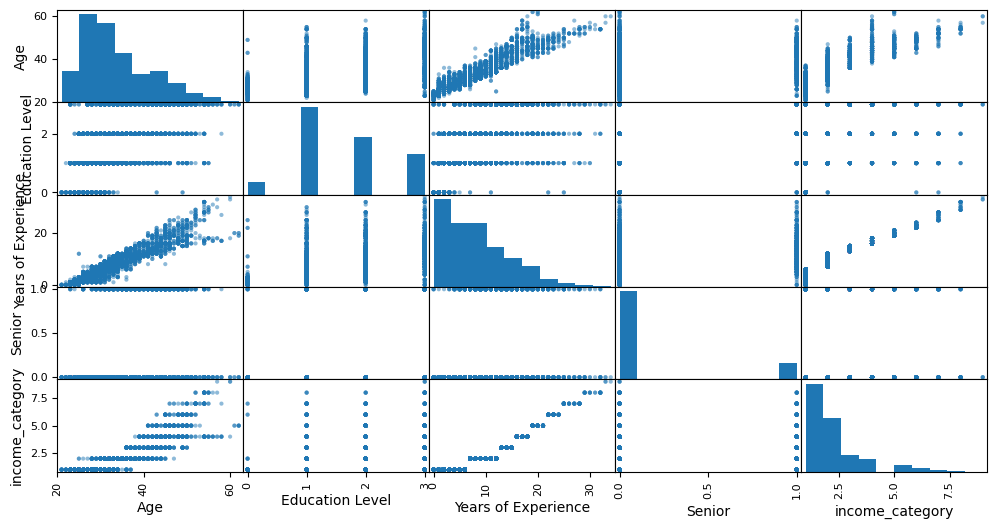

In [206]:
from pandas.plotting import scatter_matrix
scatter_matrix(x_train,figsize=(12,6))


In [213]:
from sklearn.compose  import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
x_train.drop(["income_category", "Race"],axis=1,inplace=True)
x_train_num = x_train.drop(["Country","Job Title","Gender"],axis=1)
attr_num = list(x_train_num)
attr_cat = ["Country","Job Title","Gender"]
full_pipeline = ColumnTransformer([
    ("num",StandardScaler(),attr_num),
    ("cat",OrdinalEncoder(),attr_cat)
])


In [212]:
x_train

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,Senior,income_category
5658,31.0,Female,3,Data Scientist,8.0,China,Chinese,0,2
6042,38.0,Male,2,Marketing Director,14.0,China,Chinese,0,3
1215,37.0,Female,2,Software Engineer,9.0,UK,Asian,1,2
6638,32.0,Male,0,Sales Representative,3.0,USA,White,0,1
6476,41.0,Male,1,Content Marketing Manager,12.0,Canada,White,0,2
...,...,...,...,...,...,...,...,...,...
3782,30.0,Male,1,Operations Manager,5.0,USA,African American,0,1
3587,28.0,Male,1,Web Developer,4.0,USA,Hispanic,0,1
3781,35.0,Female,2,Marketing Coordinator,8.0,USA,Asian,0,2
604,27.0,Male,1,Software Engineer,4.0,Australia,White,0,1


In [214]:
x_train_prepared = full_pipeline.fit_transform(x_train)

In [180]:
x_train_prepared
x_train_prepared

array([[-3.83713923e-01,  1.55665907e+00, -5.33046407e-02, ...,
         4.00000000e+00,  2.50000000e+01,  0.00000000e+00],
       [ 5.19730297e-01,  4.18783139e-01,  9.07672251e-01, ...,
         4.00000000e+00,  6.90000000e+01,  1.00000000e+00],
       [ 3.90666837e-01,  4.18783139e-01,  1.06858175e-01, ...,
         1.00000000e+00,  1.01000000e+02,  0.00000000e+00],
       ...,
       [ 1.32539917e-01,  4.18783139e-01, -5.33046407e-02, ...,
         1.00000000e+00,  6.80000000e+01,  0.00000000e+00],
       [-8.99967763e-01, -7.19092794e-01, -6.93955902e-01, ...,
         9.00000000e+00,  1.01000000e+02,  1.00000000e+00],
       [ 1.16504760e+00,  4.18783139e-01,  9.07672251e-01, ...,
         2.00000000e+00,  9.30000000e+01,  0.00000000e+00]])

In [215]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train_prepared,y_train)

LinearRegression()

In [216]:
from sklearn.metrics import mean_squared_error
y_pred = linear.predict(x_train_prepared)
err = mean_squared_error(y_pred, y_train)

In [217]:
np.sqrt(err)

27588.8836040355

In [218]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linear,x_train_prepared,y_train,cv=3,scoring="neg_mean_squared_error")

In [219]:
np.sqrt(-score)

array([27641.56302033, 28116.12992856, 27329.99202862])

In [220]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

svr = SVR()
forest = RandomForestRegressor()
tree = DecisionTreeRegressor()
linear = LinearRegression()


In [221]:
score = cross_val_score(forest,x_train_prepared,y_train,cv=3,scoring="neg_mean_squared_error")


In [222]:
np.sqrt(-score)

array([11157.78598553, 11186.26184144, 12275.6081575 ])

In [223]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = [
    {"n_estimators":[3,10,30], "max_features":[2,4,6,8]},
    {"bootstrap":[False],"n_estimators":[3,10,30],"max_features": [2,3,4,6,8]}
]
param_grid_random = [
    {"max_depth":[2,4,6,8,10], "max_features":[2,4,6,8],"min_samples_leaf":[1,2,4,6,8,10]},
]

param_grid_svr = [
    {"kernel":["linear", "poly", "rbf", "sigmoid", "precomputed"],"max_iter":[2,4,6,8,10],"degree":[3,4,5,6,7,8,10]}
]
param_grid_linear = [
    {"n_jobs":[2,4,6,8,10],"positive":[True,False]}
]

In [224]:
grid_search = RandomizedSearchCV(forest,param_grid,n_iter=10,cv=5,scoring="neg_mean_squared_error",random_state=1)
random = RandomizedSearchCV(tree,param_grid_random,n_iter=10,cv=5,scoring="neg_mean_squared_error",random_state=1)
svr = RandomizedSearchCV(svr,param_grid_svr,n_iter=10,cv=5,scoring="neg_mean_squared_error",random_state=1)
linear_search = RandomizedSearchCV(linear,param_grid_linear,n_iter=10,cv=5,scoring="neg_mean_squared_error",random_state=42)

In [225]:
grid_search.fit(x_train_prepared,y_train)
random.fit(x_train_prepared,y_train)
linear_search.fit(x_train_prepared,y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions=[{'n_jobs': [2, 4, 6, 8, 10],
                                         'positive': [True, False]}],
                   random_state=42, scoring='neg_mean_squared_error')

In [226]:
grid_search.best_estimator_
linear_search.best_estimator_

LinearRegression(n_jobs=2)

In [227]:
final_model = grid_search.best_estimator_
final_model_random = random.best_estimator_
final_model_linear= linear_search.best_estimator_
final_prediction = final_model.predict(x_train_prepared)

In [228]:
score = cross_val_score(final_model,x_train_prepared,y_train,cv=3,scoring="neg_mean_squared_error")
np.sqrt(-score)

array([10993.73465671, 11457.08300206, 12454.10209849])

In [229]:
x_train_prepared

array([[-3.83713923e-01,  1.55665907e+00, -5.33046407e-02, ...,
         2.00000000e+00,  2.50000000e+01,  0.00000000e+00],
       [ 5.19730297e-01,  4.18783139e-01,  9.07672251e-01, ...,
         2.00000000e+00,  6.90000000e+01,  1.00000000e+00],
       [ 3.90666837e-01,  4.18783139e-01,  1.06858175e-01, ...,
         3.00000000e+00,  1.01000000e+02,  0.00000000e+00],
       ...,
       [ 1.32539917e-01,  4.18783139e-01, -5.33046407e-02, ...,
         4.00000000e+00,  6.80000000e+01,  0.00000000e+00],
       [-8.99967763e-01, -7.19092794e-01, -6.93955902e-01, ...,
         0.00000000e+00,  1.01000000e+02,  1.00000000e+00],
       [ 1.16504760e+00,  4.18783139e-01,  9.07672251e-01, ...,
         0.00000000e+00,  9.30000000e+01,  0.00000000e+00]])

In [230]:

x_test_prepared = full_pipeline.fit_transform(x_test)
x_test_prepared

array([[-0.77985232, -0.74692659, -0.86249793, ...,  3.        ,
        68.        ,  1.        ],
       [ 2.80834457,  1.49124459,  1.39530937, ...,  2.        ,
        64.        ,  1.        ],
       [-0.13910287, -0.74692659,  0.10513377, ...,  1.        ,
        39.        ,  1.        ],
       ...,
       [-0.13910287,  1.49124459,  0.26640572, ...,  4.        ,
        56.        ,  1.        ],
       [-0.39540265,  0.372159  , -0.53995403, ...,  3.        ,
        39.        ,  0.        ],
       [ 1.01424613,  0.372159  ,  0.91149352, ...,  0.        ,
        47.        ,  1.        ]])

In [231]:
x_train_prepared
y_test

3549     55000.0
1460    195000.0
5446    130000.0
4687    120000.0
1445    170000.0
          ...   
2608    102868.0
4690    140000.0
5038    155000.0
4250     68000.0
2331    180000.0
Name: Salary, Length: 1287, dtype: float64

In [232]:
svr.fit(x_train_prepared,y_train)
random.fit(x_train_prepared,y_train)
y_test_pred = final_model.predict(x_test_prepared)
y_test_pred_random = final_model_random.predict(x_test_prepared)
y_test_pred_svr= final_model_linear.predict(x_test_prepared)
y_test_pred_random_2 = random.predict(x_test_prepared)

c:\Users\daniel.suassuna\Anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\daniel.suassuna\Anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\daniel.suassuna\Anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\daniel.suassuna\Anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\daniel.suassuna\Anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarnin

In [233]:

print(np.sqrt(mean_squared_error(y_test_pred,y_test)))
print(np.sqrt(mean_squared_error(y_test_pred_random,y_test)))
print(np.sqrt(mean_squared_error(y_test_pred_svr,y_test)))
print(np.sqrt(mean_squared_error(y_test_pred_random_2,y_test)))


26023.968079422757
31384.89760279671
28309.976255002755
31433.212444047476


In [200]:
dados["Salary"].max()

250000.0

In [201]:
some_salarys = y_test.iloc[:10]

In [202]:
some_train = x_test.iloc[:10]
some_train_prepared = full_pipeline.fit_transform(some_train)

In [203]:
some_train_pred = random.predict(some_train_prepared)
y_pred_tree = final_model.predict(x_test_prepared)
np.sqrt(mean_squared_error(some_salarys,some_train_pred))

36648.98773678325

In [204]:
for x,y in zip(some_salarys, some_train_pred):
    print("dado real   dado previsto")
    print(x,f"   {round(y,3)}")

dado real   dado previsto
55000.0    30050.0
dado real   dado previsto
195000.0    170000.0
dado real   dado previsto
130000.0    103608.857
dado real   dado previsto
120000.0    103608.857
dado real   dado previsto
170000.0    100286.778
dado real   dado previsto
170000.0    196000.0
dado real   dado previsto
177347.0    201666.667
dado real   dado previsto
82697.0    70833.333
dado real   dado previsto
115000.0    81119.111
dado real   dado previsto
140000.0    201666.667
